# Mask R-CNN Demo - Building Footprint Trial CrowdAI Weights

Trial of crowdai weights on building footprint - notebook based on mask r-cnn demo notebook
https://github.com/crowdAI/crowdai-mapping-challenge-mask-rcnn

In [1]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")
print(ROOT_DIR)

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
#import coco
from samples.coco import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# remove coco model path
# # Local path to trained weights file
# COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# # Download COCO trained weights from Releases if needed
# if not os.path.exists(COCO_MODEL_PATH):
#     utils.download_trained_weights(COCO_MODEL_PATH)

PRETRAINED_MODEL_PATH = os.path.join(ROOT_DIR,"weights/crowdai_baseline_pretrained_weights.h5")

# Directory of images to run detection on
#IMAGE_DIR = os.path.join(ROOT_DIR, "images") #Mask_RCNN demo images
IMAGE_DIR = os.path.join(ROOT_DIR, "../../data/Environment_Agency/Vertical_Photography/512/P_4641/Ortho_RGB_P00012380_20070825_20081018_40cm_res/")
#print(os.listdir(ROOT_DIR + "/../../../data/Environment_Agency/Vertical_Photography/512/P_4641/Ortho_RGB_P00012380_20070825_20081018_40cm_res/"))

/home/ot19968/Projects/Mask_RCNN


/home/ot19968/anaconda3/envs/matterport/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ot19968/anaconda3/envs/matterport/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ot19968/anaconda3/envs/matterport/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ot19968/anaconda3/envs/ma

## Configurations

We'll be using a model trained on the MS-COCO dataset. The configurations of this model are in the ```CocoConfig``` class in ```coco.py```.

For inferencing, modify the configurations a bit to fit the task. To do so, sub-class the ```CocoConfig``` class and override the attributes you need to change.

In [2]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 1 + 1  # 1 Background + 1 Building
    IMAGE_MAX_DIM=320
    IMAGE_MIN_DIM=320
    NAME = "crowdai-mapping-challenge"

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  320
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  320
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [320 320   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE             

## Create Model and Load Trained Weights

In [3]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

model_path = PRETRAINED_MODEL_PATH

# Load weights trained on MS-COCO
model.load_weights(model_path, by_name=True)

## crowdai Class Names


In [4]:
class_names = ['BG', 'building'] # In our case, we have 1 class for the background, and 1 class for building

## Run Object Detection

Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 320, 320, 3)      min: -123.70000  max:  146.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 25575, 4)         min:   -1.13492  max:    1.93429  float32


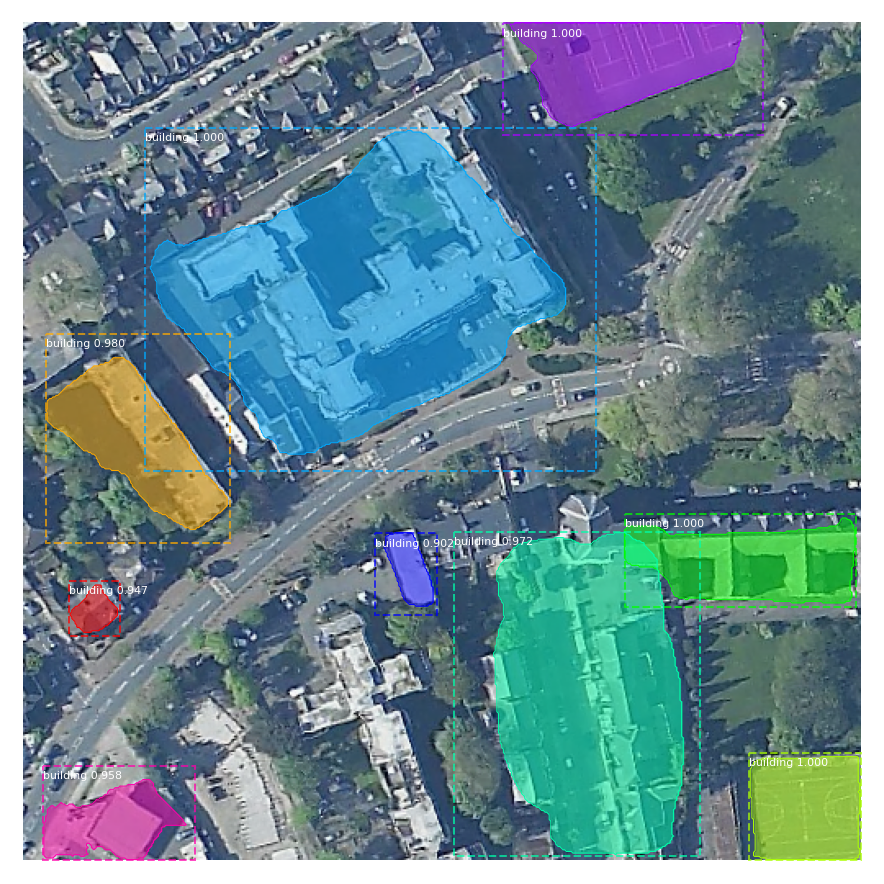

In [18]:
image_number = 81


# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread(os.path.join(IMAGE_DIR, file_names[image_number]), plugin="tifffile")
# skimage.io.imshow(image)
# plt.show()
image_without_alpha = image[:,:,:3]
# skimage.io.imshow(image_without_alpha)
# plt.show()

# # Run detection
# results = model.detect([image], verbose=1)

# # Visualize results
# r = results[0]
# visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
#                             class_names, r['scores'])

# Run detection
results = model.detect([image_without_alpha], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image_without_alpha, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

In [ ]:

# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]

for x in range(len(file_names)):
    image = skimage.io.imread(os.path.join(IMAGE_DIR, file_names[x]), plugin="tifffile")
    # skimage.io.imshow(image)
    # plt.show()
    image_without_alpha = image[:,:,:3]
    # skimage.io.imshow(image_without_alpha)
    # plt.show()

    # # Run detection
    # results = model.detect([image], verbose=1)

    # # Visualize results
    # r = results[0]
    # visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
    #                             class_names, r['scores'])

    # Run detection
    results = model.detect([image_without_alpha], verbose=1)

    print("Image number: " + str(x))
    # Visualize results
    r = results[0]
    visualize.display_instances(image_without_alpha, r['rois'], r['masks'], r['class_ids'], 
                                class_names, r['scores'])
